# Shruti Kharote Wadalkar

Task 1: Prediction using Supervised ML

 Simple linear regression task involves just 2 variables, to predict the percentage of an student based on the no. of study hours.e.g. 9.25 hrs/day


In [50]:
#importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Loading dataset
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
#Size of the dataset
df.shape

(25, 2)

In [53]:
#To see statistical details
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We have lable dataset so this is supervised learning problem, also only two varible and from statistical details Scores values increases as Hours column increases so let's select linear regression algorithm so can we predict scores for 9.25 hours/day study time?

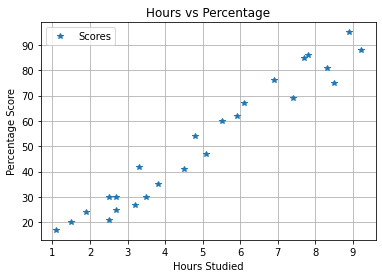

In [54]:
#plotting the distribution of scores
#Here we are using plot function from pandas data frame to plot dependent and independent variable

df.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

 From above graph positive linear regression line best fit for this data set, Let's see

## preparing the data

Devide data into attributes(indepedent variable) and lables (dependent variable)

In [55]:
x = df.iloc[:, :-1].values # Only 1st column Hours
y = df.iloc[:, 1].values # Only last column Scores 

 To evaluate performance of our linear regression ML algorithm, lets split data into 80% and 20% size, so that train model on 80% data set and test model on 20% data
 
 test_size is function where we actually specify the proportion of the test set

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state = 0)

In [57]:
# Training algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

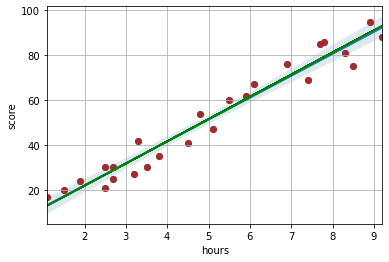

In [58]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.scatter(x, y, color= 'brown')
plt.plot(x, line, color = 'Green')
plt.grid()
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [59]:
#Observing correction

print(model.coef_)

[9.91065648]


correlation coeffitient explain linear relationship between two variable, so we are on right path

# Making prediction

In [60]:
print(x_test) #Testing data - In hours
y_pred = model.predict(x_test) #Predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [61]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [62]:
#Comparing actual vs predicted
df = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Actual': y_test, 'Predicted': y_pred})
df

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [63]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print('Expected score if the student studies for 9.25 hours is : {}'.format(round(own_pred[0],2)))

Expected score if the student studies for 9.25 hours is : 93.69


In [64]:
#Calculate accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


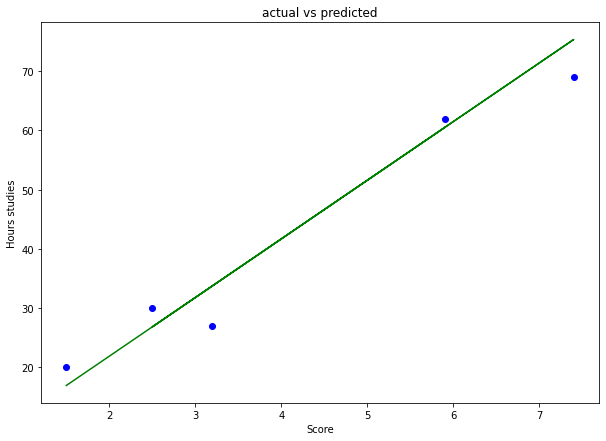

In [65]:
#fig size
fig = plt.figure(figsize=(10,7))

#visually comparing the predicted marks with actual marks
plt.scatter(x= x_test, y= y_test, color = 'blue')
plt.plot(x_test, y_pred, color = 'green')
plt.title('actual vs predicted')
plt.xlabel('Score')
plt.ylabel('Hours studies')
plt.show()

#Thank you